<div class="licence">
<span>Licence CC BY-NC-ND</span>
<span>Valérie Roy</span>
<span><img src="media/ensmp-25-alpha.png" /></span>
</div>

# arrays


**importing the numpy library**, **by convention** *numpy* should be named **np** 

In [1]:
import numpy as np


## creating arrays in **numpy** with the function *numpy.array*

### creating a *numpy.ndarray* from an existing *python* list

In [2]:
tab = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]  # a python list
a = np.array(tab)
a


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

we **create** an object of **type** *numpy.ndarray* (the **core datatype** of *numpy*)

*numpy.ndarray* is the **core datatype** of *numpy*

In [3]:
type(a)


numpy.ndarray

### underlying memory of a *numpy.ndarray*

   - the **underlying memory** is a **contiguous one-dimensional** segment of computer memory
   
   - it will be **combined** with **indexing schemes** for **multi-dimensions**
   
   - a segment of *12* elements, can be considered:
      + as a vector of size *12*
      + as a matrix of size *(2, 6)*
      + as a matrix of size *(3, 4)*    
      + as two matrices of size *(2, 3)*
      
      
   - each **indexing scheme** is simply a **view** on the **underlying segment**
   

#### elements
  
   - in a *numpy.ndarray* **all** the elements have the **same data type**
   - (**unlike** python's containers)

**why ?** 
   - for the sake of **speed**:
   - it is **much faster** to access memory along a **single segment**
   - (where each **case** has the same size)
   - than to access **small portions** of memory
   - (where cases can be **everywhere** in the memory (cf. NTFS vs ext4 fragmentation)
   - (as we would be in the case of python lists !)
   - but python lists have other **advantages** 

#### in consequence
   - a *numpy.ndarray* is very **compact**
   - all methods we apply on it are **optimized**

### creating a *numpy.ndarray* from a **python** generator [advanced]
   - you need the *numpy.fromiter* function

In [4]:
p = (i for i in range(20) if i%2 == 0) # p is a generator of the even numbers from 0 to 18
p


<generator object <genexpr> at 0x7f8ed1fd62a0>

In [5]:
a = np.fromiter(p, dtype = np.int8)
a


array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18], dtype=int8)

### creating *integer* and *float* ranges with step
   - with the function *numpy.arange(from, to-excluded, step)*

In [6]:
np.arange(0, 10, 2) # integer elements
                    # range like in python    
np.arange(start=0, stop=10, step=2)


array([0, 2, 4, 6, 8])

In [7]:
np.arange(0., 3., 0.3) # float elements
                       # from, to-excluded, step
    

array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7])

note that **stop** are **excluded** (here $10$ and $3.$)

### creating **float** ranges with **number** of values
   - with the function *numpy.linspace(from, to-included, step)*

In [8]:
np.linspace(0, 1, 5) # from, to-included, number


array([0.  , 0.25, 0.5 , 0.75, 1.  ])

note that **stop** is **included** (here *1*)
   - (it was **excluded** in *numpy.arange*)

#### *numpy.linspace* is very useful

In [9]:
x = np.linspace(0, 2*np.pi, 80)
y = np.sin(x)


In [10]:
from matplotlib import pyplot as plt
%matplotlib inline


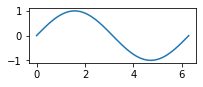

In [11]:
plt.figure(figsize=(3, 1)) 
plt.plot(x, y);


## type of the elements

**without** any indication *numpy* **decides** on **its own**

### initialising with homogeneous arrays

#### an **integer** array

In [12]:
np.array([0, 1, 2, 3, 4, 5, 6, 7]).dtype


dtype('int64')

   - elements are all integers
   - the array will be an integer-typed array

   - here we **get** integers on *64* bits

#### a **float** array

In [13]:
np.array([0.72, -1.45, 2.29]).dtype


dtype('float64')

   - elements are all floats
   - the array will be a floating-point typed array

#### a **Boolean** array

In [14]:
np.array([True, False]).dtype


dtype('bool')

   - elements are all booleans (scalar type)
   - the array will be a boolean typed array

#### a **character string** array

In [15]:
np.array(['hello', 'world!']).dtype


dtype('<U6')

   - the element must have the same **type**
   - the **longuest** string has *6* characters
   - i.e. **all** the elements will be **strings with *6* characters**

**the type is '<U6'**
   - **U** for Unicode
   - *6* is the number of octets to hold the longuest string (here 'world!')
   - (< is for little endian, i.e. the order in which the octets are stored in memory)

### initialising with heterogeneous arrays

**we mix integers and floats**

In [16]:
l = [0, 1., 2, 3, 4, 5, 6, 7.]
l


[0, 1.0, 2, 3, 4, 5, 6, 7.0]

in **python**
   - containers are **heterogeneous**
   - **no** conversion is done
   - here, the list *l* is composed of two floats and eight integers

in **numpy**
   - the only container is the **numpy.ndarray**
   - it is an **homogeneous** container
   - all the elements have the same type
   - **conversions** must be **done**

In [17]:
np.array([0, 1., 2, 3, 4, 5, 6, 7.]).dtype


dtype('float64')

the eight integers have been **converted** in **floats**

#### the data type
   - is **deduced** as the ***smaller*** **type** that can **hold** all the elements
   - *numpy* tries **not** to **lose** information
   - the elements are converted **automatically** and **silently**
   - it is **very different** from the *Python* **philosophy**

in this example, **False** is converted to  *0* of the **integers**

In [18]:
np.array([False, 1, 2, 3, 4, 5, 6, 7]).dtype


dtype('int64')

in this example, **True** is converted to $1.$ of the **floats**

In [19]:
np.array([False, 1., 2, 3, 4, 5, 6, 7]).dtype


dtype('float64')

mixing **numbers** and **strings**

In [20]:
np.array([0, 1, 2, 3, 4, 5, 6, '7'])


array(['0', '1', '2', '3', '4', '5', '6', '7'], dtype='<U21')

mixing **strings** and **numbers**

In [21]:
np.array(['0', 1, 2, 3, 4, 5, 6, 7])


array(['0', '1', '2', '3', '4', '5', '6', '7'], dtype='<U1')

**oups !**
   - one type is *'<U21'* and the other *'<U1'*
   - in such cases ask **stackoverflow**
   - ... or do not try to understand every thing

#### modifying an element in an *numpy.ndarray* can result in a loss of precision

In [22]:
a = np.array([0, 1, 2, 3, 4, 5, 6, 7])
a.dtype


dtype('int64')

we modify an element by an element of another type 

In [23]:
a[0] = 3.14159
a[0]


3

   - you will **not** get a **float**
   - it will be **converted** to **integer**
   - you have lost **precision**

### forbiding the modification of the elements of an array  [advanced]
   - by using *numpy.ndarray.flags.writeable*
   - i.e. the array became **immutable**
   - (like an array with constant elements)

In [24]:
a = np.random.randint(1, 20, 10)


In [25]:
a[0] = 99


In [26]:
a.flags.writeable = False


In [27]:
try:
    a[0] = 100
except ValueError as e:
    print(e)
    

assignment destination is read-only


### giving the type of the elements at initialisation
   - with the *dtype* parameter

   - *numpy* types are listed there
      + https://docs.scipy.org/doc/numpy/user/basics.types.html

**we create an integer array**

In [28]:
a = np.array([0, 1, 2, 3, 4, 5, 6]) # integer 64-bits
a.dtype


dtype('int64')

**we indicate the type using the parameter *dtype***

In [29]:
a_1 = np.array([0, 1, 2, 3, 4, 5, 6], dtype=np.int8) # integer 8-bits
a_1


array([0, 1, 2, 3, 4, 5, 6], dtype=int8)

   - elements in *a* are stored on *64* bits 
   - elements in *a_1* are stored on *8* bits 


#### accessing the size of each element
   - it is the number of **bytes** an **element** is **stored on**

In [30]:
a.itemsize


8

In [31]:
a_1.itemsize


1

#### accessing the global size of an array
   - the number of elements *x* the number of bytes each element is stored on

In [32]:
a.nbytes == 7 * 8  # the number of bytes


True

**note**
   - here we **only** calculated the size of the data **buffer underlying** the *ndarray*
   - the *ndarray* has also some **overhead** of memory to store other attributes

#### The difference between *int8* and *int64* ?


**with *8* bits**
   - i can represent $2^{8}$ integer values
      - from $0$ to $255$ (when **unsigned** i.e. $0$ to $2^n-1$)
      - from $-128$ to $127$ (when if **signed** i.e. $-2^{n-1}$ to $2^{n-1} -1$

   - *8* **bits** form a **byte** (**octet**)
   
**the underlying memory of**
   - *a* is *7 x 64 x 8* bits
   - *a_1* is *7 x 8 x 8* bits
   - the type you chose must hold **all** the values you want to **represent** 
   

**conversion from 64-bits integers to 32-bits or 16-bits or 8-bits integers**
   - is not **safe**
   - i.e. values can be **truncated**

**you must master what you do**
   - because *numpy* will **obey** your wishes

#### integers can be truncated

In [33]:
nmax = 2**64 - 1    # we take the greatest integer on 64 bits
nmax


18446744073709551615

In [34]:
a = np.array([nmax])  # we put it in an numpy.ndarray
a


array([18446744073709551615], dtype=uint64)

In [35]:
b = np.array([nmax], np.uint32) # we change the type of the elements
b


array([4294967295], dtype=uint32)

In [36]:
b[0] == 2**32-1 # nmax is converted to the greatest 32-bits unsigned integer


True

#### floats can be truncated too

In [37]:
a = np.array([1.22, 2.34, 3.57, 4.99], dtype=np.int32)  # you will not obtain floats !
a


array([1, 2, 3, 4], dtype=int32)

your floats have been **truncated** without hesitation !

#### characters strings

you can **force** the characters string to be *4* characters long rather than *1*

In [38]:
np.array(['0', '1', '2', '3', '4', '5', '6', '7'], dtype='<U4')


array(['0', '1', '2', '3', '4', '5', '6', '7'], dtype='<U4')

you can **force** the characters string to be **converted** in integers on 16 bits

In [39]:
np.array(['0', '1', '2', '3', '4', '5', '6', '7'], dtype='int16')


array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int16)

In [40]:
np.array(['0', '1', True], dtype=np.int16) # you will obtain integers on 16 bits


array([0, 1, 1], dtype=int16)

#### if you do non-sense, errors will be raised

In [41]:
np.array(['0', '1', 'True'], dtype=np.int16) # now you will obtain nothing


ValueError: invalid literal for int() with base 10: 'True'

In [42]:
# in order to avoid interrupting the execution: we can catch the error 
try:
    np.array(['0', '1', 'True'], dtype=np.int16)
except ValueError as e:
    print("we are here")
    print(e)
    

we are here
invalid literal for int() with base 10: 'True'


### modifying the type of an array

In [43]:
d = np.array([1, 2, 3, 4, 5])
d.dtype


dtype('int64')

cast to **another** type with the method *numpy.ndarray.astype*

In [44]:
d.astype(np.int16)


array([1, 2, 3, 4, 5], dtype=int16)

the **original** array has **not** changed

In [45]:
d.dtype


dtype('int64')

**the method returns a new array**
   - it does **not modify** the **original** one
   - you have to **assign** the new array to some variable

In [46]:
d = np.array([1, 2, 3, 4, 5])
d = d.astype(np.int32)


#### unsafe conversion
   - when the conversion is not **safe**: values can be **truncated**

In [47]:
np.can_cast(np.int32, np.int64)  # ok to convert integers from 32-bits to 64-bits


True

In [48]:
np.can_cast(np.int64, np.int32)  # it is not safe to convert from 64-bits to 32-bits


False

### refusing an unsafe conversion
   - regardless to any modification of values
   - with the parameter *casting='safe'*

it is **not safe** to cast from an integer 64-bits to an integer 32-bits

In [49]:
try:
    d = np.array([1, 2, 3, 4, 5], dtype='int64')
    d.astype(np.int32, casting='safe')
except TypeError as e:
    print(e)
    

Cannot cast array from dtype('int64') to dtype('int32') according to the rule 'safe'


it is **safe** to cast from a 16-bits integer to a 32-bits integer

In [50]:
d = np.array([1, 2, 3, 4, 5], dtype='uint16')
d.astype(np.int32, casting='safe')


array([1, 2, 3, 4, 5], dtype=int32)

### predefined-types for *numpy-ndarray*

https://docs.scipy.org/doc/numpy/reference/arrays.scalars.html

In [51]:
np.sctypes # u for unsigned


{'int': [numpy.int8, numpy.int16, numpy.int32, numpy.int64],
 'uint': [numpy.uint8, numpy.uint16, numpy.uint32, numpy.uint64],
 'float': [numpy.float16, numpy.float32, numpy.float64, numpy.float128],
 'complex': [numpy.complex64, numpy.complex128, numpy.complex256],
 'others': [bool, object, bytes, str, numpy.void]}

you can see integers, floating-point numbers, complex, bool, ...

### information on types
   - **min** and **max** values of **numpy** **types**

**info** on **integers**

In [52]:
np.iinfo(np.int8).min


-128

In [53]:
np.iinfo(np.uint16).max


65535

**info** on **float**

In [54]:
np.finfo(np.float32).min


-3.4028235e+38

In [55]:
np.finfo(np.float64).max


1.7976931348623157e+308

### accessing the size of arrays

| method                            | what they do                           	  |
|-----------------------------------|---------------------------------------------|
| `numpy.size`             | total number of elements in the array       |
| `numpy.ndarray.itemsize`  | size in bytes of a single item              |
| `numpy.ndarray.nbytes`  	| total size in bytes of the underlying array |
| `numpy.shape`  	        | **dimensional shape** of the array            |
| `numpy.ndim`  	        | **dimensional shape** of the array            |

In [56]:
d = np.array([1, 2, 3, 10, 20, 30])
d


array([ 1,  2,  3, 10, 20, 30])

In [57]:
print(f'd.size is {d.size} (number of elements)\n')


d.size is 6 (number of elements)



In [58]:
print(f'd.itemsize is {d.itemsize} (number of bytes of a single element)\n')


d.itemsize is 8 (number of bytes of a single element)



In [59]:
print(f'd.nbytes is {d.nbytes} (number of bytes of the elements in the array)\n')


d.nbytes is 48 (number of bytes of the elements in the array)



In [60]:
print(f'shape {d.shape} (dimentional structure of the array)\n')


shape (6,) (dimentional structure of the array)



In [61]:
print(f'shape {d.ndim} (number of dimensions of the array\n')


shape 1 (number of dimensions of the array



## dealing with unavailable or invalid values

   - **NaN** Not a Number
   
   - **NA**  Not Avalaible

when **invalid values** are put in *numpy.ndarray*
   - their value is *numpy.nan*
   - e.g *numpy.log(-1)* is an **invalid value** i.e. it will be a *numpy.nan*

In [62]:
a = np.array([np.log(-1.), np.log(-10.)])
a


/home/vr/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


array([nan, nan])

In [63]:
np.isnan(np.log(-1.))


/home/vr/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


True

the **type** of *NaN* and *NA* is *float*  for *numpy.ndarray*

In [64]:
type(np.nan)


float

In [65]:
a.dtype


dtype('float64')

**be careful**:
   - *numpy.NaN* is a **float**   
   - there is **no** equivalent for **integers**

In [66]:
a = np.array([1, 2, 3, np.nan])
print(a.dtype)
a


float64


array([ 1.,  2.,  3., nan])

**infinite** is not a *numpy.nan* 

In [67]:
np.log(0)


/home/vr/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


-inf

In [68]:
np.log(0) == -np.inf


/home/vr/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


True

   - *numpy.log(0)* is *-infinite* and not **NaN**
   - see *numpy* **constants** https://www.numpy.org/devdocs/reference/constants.html

??? TODO

### exercice
   - create two arrays of size $n$
   - initialized with **randon numbers** ($\in [0, 1[$)
   - the first array is the $x$ axe, the second the $y$
   - compute the norm of all points
   
**hints:**
   - use the *numpy.random.rand*, *numpy.power* and *numpy.sqrt*
   - 

### correction

In [69]:
n = 5
pos = np.random.random((10,2))
dist = np.sqrt(np.power(pos[:, 0], 2) + np.power(pos[:, 1], 2))